In [ ]:
pip install demoji

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.9/42.9 kB 893.2 kB/s eta 0:00:00


In [ ]:
pip install tensorflow keras

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, Flatten, SimpleRNN
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
import re

import demoji
demoji.download_codes()

<ipython-input-3-9e80f575a148>:4: FutureWarning: The demoji.download_codes attribute is deprecated and will be removed from demoji in a future version. It is an unused attribute as emoji codes are now distributed directly with the demoji package.
  demoji.download_codes()


In [ ]:
import nltk
from collections import defaultdict
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('vader_lexicon')
nltk.download('punkt')

WNL = nltk.WordNetLemmatizer()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score, classification_report

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.preprocessing import LabelEncoder

#Importing dataset

In [ ]:
MainFile = pd.read_csv('/content/ScrapedBooksData.csv')

MainFile.head()

,Title,Ranking,Author,Rating,YearReleased,Description,Genres,Pages,MonthReleased
0,"The Gunslinger (The Dark Tower, #1)",1,Stephen King,3.93,1982,"In the first book of this series, Stephen King...","Fantasy, Fiction, Horror, Science Fiction, Wes...",231,June
1,The Color Purple,2,Alice Walker,4.26,1982,"Read the original inspiration for the new, bol...","Fiction, Historical Fiction, Feminism, Classic...",304,June
2,The BFG,3,Roald Dahl,4.23,1982,Captured by a giant! The BFG is no ordinary bo...,"Fantasy, Childrens, Fiction, Classics, Middle ...",199,November
3,The House of the Spirits,4,Isabel Allende,4.27,1982,In one of the most important and beloved Latin...,"Fiction, Magical Realism, Historical Fiction, ...",448,January
4,Schindler's List,5,Thomas Keneally,4.34,1982,"In the shadow of Auschwitz, a flamboyant Germa...","History, Nonfiction, Holocaust, War, Historica...",429,October


In [ ]:
MainFile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6300 entries, 0 to 6299
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Title          6300 non-null   object 
 1   Ranking        6300 non-null   int64  
 2   Author         6300 non-null   object 
 3   Rating         6300 non-null   float64
 4   YearReleased   6300 non-null   int64  
 5   Description    6299 non-null   object 
 6   Genres         6300 non-null   object 
 7   Pages          6300 non-null   object 
 8   MonthReleased  6300 non-null   object 
dtypes: float64(1), int64(2), object(6)
memory usage: 443.1+ KB


In [ ]:
MainFile.describe()

,Ranking,Rating,YearReleased
count,6300.000000,6300.000000,6300.000000
mean,75.500000,4.031532,2002.500000
std,43.303745,0.239374,12.121881
min,1.000000,2.520000,1982.000000
25%,38.000000,3.880000,1992.000000
50%,75.500000,4.040000,2002.500000
75%,113.000000,4.190000,2013.000000
max,150.000000,4.800000,2023.000000


In [ ]:
MainFile.isnull().sum()

Title            0
Ranking          0
Author           0
Rating           0
YearReleased     0
Description      1
Genres           0
Pages            0
MonthReleased    0
dtype: int64

In [ ]:
MainFile.duplicated().sum()

0

# Handle values and convert Pages column to int

In [ ]:
'''
 books that did not have page information instead got assigned type of published
 medium due to nature of scraping method, luckily only around 9 books out of 6000+ !

'''


MainFile['Pages'] = MainFile['Pages'].replace( ['Mass', 'Paperback', 'Audio', 'Audiobook', 'ebook', 'Kindle', 'Hardcover'] , pd.NA)

MainFile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6300 entries, 0 to 6299
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Title          6300 non-null   object 
 1   Ranking        6300 non-null   int64  
 2   Author         6300 non-null   object 
 3   Rating         6300 non-null   float64
 4   YearReleased   6300 non-null   int64  
 5   Description    6299 non-null   object 
 6   Genres         6300 non-null   object 
 7   Pages          6291 non-null   object 
 8   MonthReleased  6300 non-null   object 
dtypes: float64(1), int64(2), object(6)
memory usage: 443.1+ KB


In [ ]:
#MainFile = MainFile.astype( {'Pages':'int'} )

MainFile['Pages'] = MainFile['Pages'].fillna(0)

MainFile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6300 entries, 0 to 6299
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Title          6300 non-null   object 
 1   Ranking        6300 non-null   int64  
 2   Author         6300 non-null   object 
 3   Rating         6300 non-null   float64
 4   YearReleased   6300 non-null   int64  
 5   Description    6299 non-null   object 
 6   Genres         6300 non-null   object 
 7   Pages          6300 non-null   object 
 8   MonthReleased  6300 non-null   object 
dtypes: float64(1), int64(2), object(6)
memory usage: 443.1+ KB


In [ ]:
MainFile = MainFile.astype( {'Pages':'int'} )

MainFile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6300 entries, 0 to 6299
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Title          6300 non-null   object 
 1   Ranking        6300 non-null   int64  
 2   Author         6300 non-null   object 
 3   Rating         6300 non-null   float64
 4   YearReleased   6300 non-null   int64  
 5   Description    6299 non-null   object 
 6   Genres         6300 non-null   object 
 7   Pages          6300 non-null   int64  
 8   MonthReleased  6300 non-null   object 
dtypes: float64(1), int64(3), object(5)
memory usage: 443.1+ KB


# Handle missing Description

In [ ]:
MainFile['Description'] = MainFile['Description'].fillna('NULL')

MainFile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6300 entries, 0 to 6299
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Title          6300 non-null   object 
 1   Ranking        6300 non-null   int64  
 2   Author         6300 non-null   object 
 3   Rating         6300 non-null   float64
 4   YearReleased   6300 non-null   int64  
 5   Description    6300 non-null   object 
 6   Genres         6300 non-null   object 
 7   Pages          6300 non-null   int64  
 8   MonthReleased  6300 non-null   object 
dtypes: float64(1), int64(3), object(5)
memory usage: 443.1+ KB


In [ ]:
MainFile[ MainFile['Description'] == 'NULL' ]

,Title,Ranking,Author,Rating,YearReleased,Description,Genres,Pages,MonthReleased
489,Bronte: Wuthering Heights (Macmillan Master Gu...,40,Hilda D. Spear,4.15,1985,NULL,"Classics, Fiction, Romance, Literature, Classi...",96,April


#Clean description

In [ ]:
def CleanTheText(text):

    text = re.sub( r'[^A-Za-z ]+', ' ', text )
    text = ' '.join( text.split() )
    return text

MainFile['CleanerDescription'] = MainFile['Description'].apply(CleanTheText)

MainFile.head()

,Title,Ranking,Author,Rating,YearReleased,Description,Genres,Pages,MonthReleased,CleanerDescription
0,"The Gunslinger (The Dark Tower, #1)",1,Stephen King,3.93,1982,"In the first book of this series, Stephen King...","Fantasy, Fiction, Horror, Science Fiction, Wes...",231,June,In the first book of this series Stephen King ...
1,The Color Purple,2,Alice Walker,4.26,1982,"Read the original inspiration for the new, bol...","Fiction, Historical Fiction, Feminism, Classic...",304,June,Read the original inspiration for the new bold...
2,The BFG,3,Roald Dahl,4.23,1982,Captured by a giant! The BFG is no ordinary bo...,"Fantasy, Childrens, Fiction, Classics, Middle ...",199,November,Captured by a giant The BFG is no ordinary bon...
3,The House of the Spirits,4,Isabel Allende,4.27,1982,In one of the most important and beloved Latin...,"Fiction, Magical Realism, Historical Fiction, ...",448,January,In one of the most important and beloved Latin...
4,Schindler's List,5,Thomas Keneally,4.34,1982,"In the shadow of Auschwitz, a flamboyant Germa...","History, Nonfiction, Holocaust, War, Historica...",429,October,In the shadow of Auschwitz a flamboyant German...


In [ ]:
print(MainFile['Description'].head(10))

print('\n\n')

print(MainFile['CleanerDescription'].head(10))

0    In the first book of this series, Stephen King...
1    Read the original inspiration for the new, bol...
2    Captured by a giant! The BFG is no ordinary bo...
3    In one of the most important and beloved Latin...
4    In the shadow of Auschwitz, a flamboyant Germa...
5    Now celebrating the 42nd anniversary of  The H...
6    Here is the magical legend of King Arthur, viv...
7    Includes the stories “The Body” and “Rita Hayw...
8    A IS FOR AVENGER. A tough-talking former cop, ...
9    The Wisdom of Pooh.\n\nIs there such thing as ...
Name: Description, dtype: object



0    In the first book of this series Stephen King ...
1    Read the original inspiration for the new bold...
2    Captured by a giant The BFG is no ordinary bon...
3    In one of the most important and beloved Latin...
4    In the shadow of Auschwitz a flamboyant German...
5    Now celebrating the nd anniversary of The Hitc...
6    Here is the magical legend of King Arthur vivi...
7    Includes the stories The

#Removing emojis

In [ ]:
def RemoveEmojis(text):
    return demoji.replace(text, '')

MainFile['CleanerDescription'] = MainFile['CleanerDescription'].apply(RemoveEmojis)

MainFile.head()

,Title,Ranking,Author,Rating,YearReleased,Description,Genres,Pages,MonthReleased,CleanerDescription
0,"The Gunslinger (The Dark Tower, #1)",1,Stephen King,3.93,1982,"In the first book of this series, Stephen King...","Fantasy, Fiction, Horror, Science Fiction, Wes...",231,June,In the first book of this series Stephen King ...
1,The Color Purple,2,Alice Walker,4.26,1982,"Read the original inspiration for the new, bol...","Fiction, Historical Fiction, Feminism, Classic...",304,June,Read the original inspiration for the new bold...
2,The BFG,3,Roald Dahl,4.23,1982,Captured by a giant! The BFG is no ordinary bo...,"Fantasy, Childrens, Fiction, Classics, Middle ...",199,November,Captured by a giant The BFG is no ordinary bon...
3,The House of the Spirits,4,Isabel Allende,4.27,1982,In one of the most important and beloved Latin...,"Fiction, Magical Realism, Historical Fiction, ...",448,January,In one of the most important and beloved Latin...
4,Schindler's List,5,Thomas Keneally,4.34,1982,"In the shadow of Auschwitz, a flamboyant Germa...","History, Nonfiction, Holocaust, War, Historica...",429,October,In the shadow of Auschwitz a flamboyant German...


#Removing stop words

In [ ]:
def RemoveStopwords(text):

    ListofSWs = set( stopwords.words('english') )
    TextIndividualWords = text.split()

    FilteredWordList = [x for x in TextIndividualWords if x.lower() not in ListofSWs]

    return ' '.join(FilteredWordList)

MainFile['CleanerDescription2'] = MainFile['CleanerDescription'].apply(RemoveStopwords)

MainFile.head()

,Title,Ranking,Author,Rating,YearReleased,Description,Genres,Pages,MonthReleased,CleanerDescription,CleanerDescription2
0,"The Gunslinger (The Dark Tower, #1)",1,Stephen King,3.93,1982,"In the first book of this series, Stephen King...","Fantasy, Fiction, Horror, Science Fiction, Wes...",231,June,In the first book of this series Stephen King ...,first book series Stephen King introduces read...
1,The Color Purple,2,Alice Walker,4.26,1982,"Read the original inspiration for the new, bol...","Fiction, Historical Fiction, Feminism, Classic...",304,June,Read the original inspiration for the new bold...,Read original inspiration new boldly reimagine...
2,The BFG,3,Roald Dahl,4.23,1982,Captured by a giant! The BFG is no ordinary bo...,"Fantasy, Childrens, Fiction, Classics, Middle ...",199,November,Captured by a giant The BFG is no ordinary bon...,Captured giant BFG ordinary bone crunching gia...
3,The House of the Spirits,4,Isabel Allende,4.27,1982,In one of the most important and beloved Latin...,"Fiction, Magical Realism, Historical Fiction, ...",448,January,In one of the most important and beloved Latin...,one important beloved Latin American works twe...
4,Schindler's List,5,Thomas Keneally,4.34,1982,"In the shadow of Auschwitz, a flamboyant Germa...","History, Nonfiction, Holocaust, War, Historica...",429,October,In the shadow of Auschwitz a flamboyant German...,shadow Auschwitz flamboyant German industriali...


#Lemmatizing description

In [ ]:
def Lemmatize(text):

    TextIndividualWords = text.split()
    LemmatizedWords = [WNL.lemmatize(x) for x in TextIndividualWords]

    return ' '.join(LemmatizedWords)


#MainFile['CleanerDescription3'] = MainFile['CleanerDescription2'].apply(Lemmatize)
MainFile['CleanerDescription4'] = MainFile['CleanerDescription2'].apply(Lemmatize)

MainFile.head()

,Title,Ranking,Author,Rating,YearReleased,Description,Genres,Pages,MonthReleased,CleanerDescription,CleanerDescription2,CleanerDescription4
0,"The Gunslinger (The Dark Tower, #1)",1,Stephen King,3.93,1982,"In the first book of this series, Stephen King...","Fantasy, Fiction, Horror, Science Fiction, Wes...",231,June,In the first book of this series Stephen King ...,first book series Stephen King introduces read...,first book series Stephen King introduces read...
1,The Color Purple,2,Alice Walker,4.26,1982,"Read the original inspiration for the new, bol...","Fiction, Historical Fiction, Feminism, Classic...",304,June,Read the original inspiration for the new bold...,Read original inspiration new boldly reimagine...,Read original inspiration new boldly reimagine...
2,The BFG,3,Roald Dahl,4.23,1982,Captured by a giant! The BFG is no ordinary bo...,"Fantasy, Childrens, Fiction, Classics, Middle ...",199,November,Captured by a giant The BFG is no ordinary bon...,Captured giant BFG ordinary bone crunching gia...,Captured giant BFG ordinary bone crunching gia...
3,The House of the Spirits,4,Isabel Allende,4.27,1982,In one of the most important and beloved Latin...,"Fiction, Magical Realism, Historical Fiction, ...",448,January,In one of the most important and beloved Latin...,one important beloved Latin American works twe...,one important beloved Latin American work twen...
4,Schindler's List,5,Thomas Keneally,4.34,1982,"In the shadow of Auschwitz, a flamboyant Germa...","History, Nonfiction, Holocaust, War, Historica...",429,October,In the shadow of Auschwitz a flamboyant German...,shadow Auschwitz flamboyant German industriali...,shadow Auschwitz flamboyant German industriali...


#Tokennizing description

In [ ]:
def Tokenize(text):

    return word_tokenize(text)

MainFile['CleanerDescriptionTokened'] = MainFile['CleanerDescription4'].apply(Tokenize)

MainFile.head()

,Title,Ranking,Author,Rating,YearReleased,Description,Genres,Pages,MonthReleased,CleanerDescription,CleanerDescription2,CleanerDescription4,CleanerDescriptionTokened
0,"The Gunslinger (The Dark Tower, #1)",1,Stephen King,3.93,1982,"In the first book of this series, Stephen King...","Fantasy, Fiction, Horror, Science Fiction, Wes...",231,June,In the first book of this series Stephen King ...,first book series Stephen King introduces read...,first book series Stephen King introduces read...,"[first, book, series, Stephen, King, introduce..."
1,The Color Purple,2,Alice Walker,4.26,1982,"Read the original inspiration for the new, bol...","Fiction, Historical Fiction, Feminism, Classic...",304,June,Read the original inspiration for the new bold...,Read original inspiration new boldly reimagine...,Read original inspiration new boldly reimagine...,"[Read, original, inspiration, new, boldly, rei..."
2,The BFG,3,Roald Dahl,4.23,1982,Captured by a giant! The BFG is no ordinary bo...,"Fantasy, Childrens, Fiction, Classics, Middle ...",199,November,Captured by a giant The BFG is no ordinary bon...,Captured giant BFG ordinary bone crunching gia...,Captured giant BFG ordinary bone crunching gia...,"[Captured, giant, BFG, ordinary, bone, crunchi..."
3,The House of the Spirits,4,Isabel Allende,4.27,1982,In one of the most important and beloved Latin...,"Fiction, Magical Realism, Historical Fiction, ...",448,January,In one of the most important and beloved Latin...,one important beloved Latin American works twe...,one important beloved Latin American work twen...,"[one, important, beloved, Latin, American, wor..."
4,Schindler's List,5,Thomas Keneally,4.34,1982,"In the shadow of Auschwitz, a flamboyant Germa...","History, Nonfiction, Holocaust, War, Historica...",429,October,In the shadow of Auschwitz a flamboyant German...,shadow Auschwitz flamboyant German industriali...,shadow Auschwitz flamboyant German industriali...,"[shadow, Auschwitz, flamboyant, German, indust..."


In [ ]:
MainFile.drop( ['CleanerDescription', 'CleanerDescription2', 'CleanerDescription4'], axis = 1, inplace = True  )

MainFile.head()

,Title,Ranking,Author,Rating,YearReleased,Description,Genres,Pages,MonthReleased,CleanerDescriptionTokened
0,"The Gunslinger (The Dark Tower, #1)",1,Stephen King,3.93,1982,"In the first book of this series, Stephen King...","Fantasy, Fiction, Horror, Science Fiction, Wes...",231,June,"[first, book, series, Stephen, King, introduce..."
1,The Color Purple,2,Alice Walker,4.26,1982,"Read the original inspiration for the new, bol...","Fiction, Historical Fiction, Feminism, Classic...",304,June,"[Read, original, inspiration, new, boldly, rei..."
2,The BFG,3,Roald Dahl,4.23,1982,Captured by a giant! The BFG is no ordinary bo...,"Fantasy, Childrens, Fiction, Classics, Middle ...",199,November,"[Captured, giant, BFG, ordinary, bone, crunchi..."
3,The House of the Spirits,4,Isabel Allende,4.27,1982,In one of the most important and beloved Latin...,"Fiction, Magical Realism, Historical Fiction, ...",448,January,"[one, important, beloved, Latin, American, wor..."
4,Schindler's List,5,Thomas Keneally,4.34,1982,"In the shadow of Auschwitz, a flamboyant Germa...","History, Nonfiction, Holocaust, War, Historica...",429,October,"[shadow, Auschwitz, flamboyant, German, indust..."


#Cleaned dataset!

In [ ]:
MainFile.rename( columns = { 'CleanerDescription4': 'CleanerDescription' }, inplace = True )

MainFile.head()

,Title,Ranking,Author,Rating,YearReleased,Description,Genres,Pages,MonthReleased,CleanerDescriptionTokened
0,"The Gunslinger (The Dark Tower, #1)",1,Stephen King,3.93,1982,"In the first book of this series, Stephen King...","Fantasy, Fiction, Horror, Science Fiction, Wes...",231,June,"[first, book, series, Stephen, King, introduce..."
1,The Color Purple,2,Alice Walker,4.26,1982,"Read the original inspiration for the new, bol...","Fiction, Historical Fiction, Feminism, Classic...",304,June,"[Read, original, inspiration, new, boldly, rei..."
2,The BFG,3,Roald Dahl,4.23,1982,Captured by a giant! The BFG is no ordinary bo...,"Fantasy, Childrens, Fiction, Classics, Middle ...",199,November,"[Captured, giant, BFG, ordinary, bone, crunchi..."
3,The House of the Spirits,4,Isabel Allende,4.27,1982,In one of the most important and beloved Latin...,"Fiction, Magical Realism, Historical Fiction, ...",448,January,"[one, important, beloved, Latin, American, wor..."
4,Schindler's List,5,Thomas Keneally,4.34,1982,"In the shadow of Auschwitz, a flamboyant Germa...","History, Nonfiction, Holocaust, War, Historica...",429,October,"[shadow, Auschwitz, flamboyant, German, indust..."




```
|
```





```
|
```





```
|
```





```
|
```





```
|
```



# Machine Learning Models

In [ ]:
MainFile['DescriptionTestNew'] = MainFile['CleanerDescriptionTokened'].apply(lambda x: ' '.join(x))


MainFile.head()

,Title,Ranking,Author,Rating,YearReleased,Description,Genres,Pages,MonthReleased,CleanerDescriptionTokened,LabelTest,DescriptionTestNew
0,"The Gunslinger (The Dark Tower, #1)",1,Stephen King,3.93,1982,"In the first book of this series, Stephen King...","Fantasy, Fiction, Horror, Science Fiction, Wes...",231,June,"[first, book, series, Stephen, King, introduce...",bestseller,first book series Stephen King introduces read...
1,The Color Purple,2,Alice Walker,4.26,1982,"Read the original inspiration for the new, bol...","Fiction, Historical Fiction, Feminism, Classic...",304,June,"[Read, original, inspiration, new, boldly, rei...",bestseller,Read original inspiration new boldly reimagine...
2,The BFG,3,Roald Dahl,4.23,1982,Captured by a giant! The BFG is no ordinary bo...,"Fantasy, Childrens, Fiction, Classics, Middle ...",199,November,"[Captured, giant, BFG, ordinary, bone, crunchi...",bestseller,Captured giant BFG ordinary bone crunching gia...
3,The House of the Spirits,4,Isabel Allende,4.27,1982,In one of the most important and beloved Latin...,"Fiction, Magical Realism, Historical Fiction, ...",448,January,"[one, important, beloved, Latin, American, wor...",bestseller,one important beloved Latin American work twen...
4,Schindler's List,5,Thomas Keneally,4.34,1982,"In the shadow of Auschwitz, a flamboyant Germa...","History, Nonfiction, Holocaust, War, Historica...",429,October,"[shadow, Auschwitz, flamboyant, German, indust...",bestseller,shadow Auschwitz flamboyant German industriali...


In [ ]:
MainFile['Labeltest2'] = 'Worth Reading'


for year in MainFile['YearReleased'].unique():

    top_10_indices = MainFile[MainFile['YearReleased'] == year].head(10).index

    MainFile.loc[top_10_indices, 'Labeltest2'] = 'Bestseller'


MainFile.head(20)

,Title,Ranking,Author,Rating,YearReleased,Description,Genres,Pages,MonthReleased,CleanerDescriptionTokened,LabelTest,DescriptionTestNew,Labeltest2
0,"The Gunslinger (The Dark Tower, #1)",1,Stephen King,3.93,1982,"In the first book of this series, Stephen King...","Fantasy, Fiction, Horror, Science Fiction, Wes...",231,June,"[first, book, series, Stephen, King, introduce...",bestseller,first book series Stephen King introduces read...,Bestseller
1,The Color Purple,2,Alice Walker,4.26,1982,"Read the original inspiration for the new, bol...","Fiction, Historical Fiction, Feminism, Classic...",304,June,"[Read, original, inspiration, new, boldly, rei...",bestseller,Read original inspiration new boldly reimagine...,Bestseller
2,The BFG,3,Roald Dahl,4.23,1982,Captured by a giant! The BFG is no ordinary bo...,"Fantasy, Childrens, Fiction, Classics, Middle ...",199,November,"[Captured, giant, BFG, ordinary, bone, crunchi...",bestseller,Captured giant BFG ordinary bone crunching gia...,Bestseller
3,The House of the Spirits,4,Isabel Allende,4.27,1982,In one of the most important and beloved Latin...,"Fiction, Magical Realism, Historical Fiction, ...",448,January,"[one, important, beloved, Latin, American, wor...",bestseller,one important beloved Latin American work twen...,Bestseller
4,Schindler's List,5,Thomas Keneally,4.34,1982,"In the shadow of Auschwitz, a flamboyant Germa...","History, Nonfiction, Holocaust, War, Historica...",429,October,"[shadow, Auschwitz, flamboyant, German, indust...",bestseller,shadow Auschwitz flamboyant German industriali...,Bestseller
5,"Life, the Universe and Everything (The Hitchhi...",6,Douglas Adams,4.18,1982,Now celebrating the 42nd anniversary of The H...,"Science Fiction, Fiction, Humor, Fantasy, Come...",224,December,"[celebrating, nd, anniversary, Hitchhiker, Gui...",bestseller,celebrating nd anniversary Hitchhiker Guide Ga...,Bestseller
6,"The Mists of Avalon (Avalon, #1)",7,Marion Zimmer Bradley,4.13,1982,"Here is the magical legend of King Arthur, viv...","Fantasy, Fiction, Historical Fiction, Arthuria...",1009,December,"[magical, legend, King, Arthur, vividly, retol...",bestseller,magical legend King Arthur vividly retold eye ...,Bestseller
7,Different Seasons,8,Stephen King,4.35,1982,Includes the stories “The Body” and “Rita Hayw...,"Horror, Fiction, Short Stories, Thriller, Myst...",560,January,"[Includes, story, Body, Rita, Hayworth, Shawsh...",bestseller,Includes story Body Rita Hayworth Shawshank Re...,Bestseller
8,A Is for Alibi (Kinsey Millhone #1),9,Sue Grafton,3.86,1982,"A IS FOR AVENGER. A tough-talking former cop, ...","Mystery, Fiction, Crime, Mystery Thriller, Thr...",308,April,"[AVENGER, tough, talking, former, cop, private...",bestseller,AVENGER tough talking former cop private inves...,Bestseller
9,The Tao of Pooh,10,Benjamin Hoff,4.00,1982,The Wisdom of Pooh.\n\nIs there such thing as ...,"Philosophy, Nonfiction, Spirituality, Religion...",176,April,"[Wisdom, Pooh, thing, Western, Taoist, Benjami...",bestseller,Wisdom Pooh thing Western Taoist Benjamin Hoff...,Bestseller


In [ ]:
MainFile.to_csv('ScrapedDataSTRDesc2', index = False)

In [ ]:
X = MainFile[['Author', 'DescriptionTestNew']]
y = MainFile['Labeltest2']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)

In [ ]:
print(X_train, end = '\n\n')
print(X_test, end = '\n\n')

print(y_train, end = '\n\n')
print(y_test, end = '\n\n')

                 Author                                 DescriptionTestNew
188     William Kennedy  Francis Phelan ex ballplayer part time gravedi...
3522  Lauren Weisberger  happens girl fringe enters realm New York chic...
2746       Marian Keyes  Lisa Edwards Prada wearing magazine editor thi...
4642     Samantha Towle  twelve year since Tru Bennett last saw Jake We...
1633   Edward O. Wilson  superb blend lyrical description sweeping hist...
...                 ...                                                ...
6168       Liz Tomforde  RYAN distraction newest Captain Devils Chicago...
62    Stephen Jay Gould  definitive refutation argument Bell Curve smar...
1872      Brian Jacques  Redwall series soon Netflix original movie New...
635        Frank Miller  first chapter Frank Miller graphic novel maste...
2855         Ian McEwan  Ian McEwan symphonic novel love war childhood ...

[5040 rows x 2 columns]

               Author                                 DescriptionTestNew
1

In [ ]:
tfidf_transformer = TfidfVectorizer()




preprocessor = ColumnTransformer(
    transformers=[
        ('author_tfidf', tfidf_transformer, 'Author'),
        ('description_tfidf', tfidf_transformer, 'DescriptionTestNew')
    ],
    remainder='passthrough'  # Pass through any other columns
)





# Define a pipeline for Naive Bayes
nb_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('nb', MultinomialNB())
])

# Define a pipeline for Logistic Regression
lr_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('lr', LogisticRegression())
])







nb_pipeline.fit(X_train, y_train)

lr_pipeline.fit(X_train, y_train)




In [ ]:
print("Positive Class Label NB:", nb_pipeline.classes_[1])
print("Positive Class Label LR:", lr_pipeline.classes_[1])

Positive Class Label NB: Worth Reading
Positive Class Label LR: Worth Reading


In [ ]:
nb_probabilities = nb_pipeline.predict_proba(X_test)
lr_probabilities = lr_pipeline.predict_proba(X_test)




nb_custom_predictions = np.where(nb_probabilities[:, 1] > 0.98, "Worth Reading", "Bestseller")
lr_custom_predictions = np.where(lr_probabilities[:, 1] > 0.78, "Worth Reading", "Bestseller")



nb_accuracy = accuracy_score(y_test, nb_custom_predictions)
lr_accuracy = accuracy_score(y_test, lr_custom_predictions)




print("Naive Bayes Accuracy with Custom Threshold:", nb_accuracy)
print("Logistic Regression Accuracy with Custom Threshold:", lr_accuracy)




print("\n\n\n\n\nNaive Bayes Classification Report:\n\n", classification_report(y_test, nb_custom_predictions))
print("\n\n\nLogistic Regression Classification Report:\n\n", classification_report(y_test, lr_custom_predictions))

Naive Bayes Accuracy with Custom Threshold: 0.9277777777777778
Logistic Regression Accuracy with Custom Threshold: 0.9341269841269841





Naive Bayes Classification Report:

                precision    recall  f1-score   support

   Bestseller       0.11      0.01      0.02        84
Worth Reading       0.93      0.99      0.96      1176

     accuracy                           0.93      1260
    macro avg       0.52      0.50      0.49      1260
 weighted avg       0.88      0.93      0.90      1260




Logistic Regression Classification Report:

                precision    recall  f1-score   support

   Bestseller       0.53      0.10      0.16        84
Worth Reading       0.94      0.99      0.97      1176

     accuracy                           0.93      1260
    macro avg       0.74      0.54      0.56      1260
 weighted avg       0.91      0.93      0.91      1260





```
|
```



# Sample Model Input

In [ ]:
def preprocess_text(text):

    stop_words = set(stopwords.words('english'))
    words = [word.lower() for word in text.split() if word.lower() not in stop_words]


    lemmatized_words = [WNL.lemmatize(word) for word in words]

    processed_text = ' '.join(lemmatized_words)


    return processed_text

In [ ]:
TestAuthor = 'Rebecca Yarros'

TestDesc = '''Enter the brutal and elite world of a war college for dragon riders from USA Today bestselling author Rebecca Yarros

Twenty-year-old Violet Sorrengail was supposed to enter the Scribe Quadrant, living a quiet life among books and history. Now, the commanding general—also known as her tough-as-talons mother—has ordered Violet to join the hundreds of candidates striving to become the elite of Navarre: .

But when you’re smaller than everyone else and your body is brittle, death is only a heartbeat away...because dragons don’t bond to “fragile” humans. They incinerate them.

With fewer dragons willing to bond than cadets, most would kill Violet to better their own chances of success. The rest would kill her just for being her mother’s daughter—like Xaden Riorson, the most powerful and ruthless wingleader in the Riders Quadrant.

She’ll need every edge her wits can give her just to see the next sunrise.

Yet, with every day that passes, the war outside grows more deadly, the kingdom's protective wards are failing, and the death toll continues to rise. Even worse, Violet begins to suspect leadership is hiding a terrible secret.

Friends, enemies, lovers. Everyone at Basgiath War College has an agenda—because once you enter, there are only two ways out:

'''



new_input = pd.DataFrame({

    'Author': [TestAuthor],
    'DescriptionTestNew': [TestDesc]

})


new_input['DescriptionTestNew'] = new_input['DescriptionTestNew'].apply(preprocess_text)



nb_probabilities_sample = nb_pipeline.predict_proba(new_input)
lr_probabilities_sample = lr_pipeline.predict_proba(new_input)



nb_custom_threshold = 0.98
lr_custom_threshold = 0.78

# Apply the custom thresholds to get binary predictions for the sample input
nb_custom_prediction_sample = "Worth Reading" if nb_probabilities_sample[0, 1] > nb_custom_threshold else "Bestseller"
lr_custom_prediction_sample = "Worth Reading" if lr_probabilities_sample[0, 1] > lr_custom_threshold else "Bestseller"

# Print the custom predictions for the sample input
print("Naive Bayes Custom Prediction for Sample Input:", nb_custom_prediction_sample)
print("Logistic Regression Custom Prediction for Sample Input:", lr_custom_prediction_sample)

Naive Bayes Custom Prediction for Sample Input: Worth Reading
Logistic Regression Custom Prediction for Sample Input: Worth Reading


In [ ]:
nb_probabilities_sample[0,1]

0.9996312159885624

In [ ]:
lr_probabilities_sample[0,1]

0.7918271569339375



```
|
```





```
|
```





```
|
```





```
|
```





```
|
```



#Deep Learning

In [ ]:
len(MainFile['Labeltest2'])

6300

In [ ]:
len(MainFile['DescriptionTestNew'])


6300

In [ ]:
len(MainFile['Author'])

6300

In [ ]:
X11 = (MainFile['Author'].values, MainFile['DescriptionTestNew'].values)

X11

(array(['Stephen King', 'Alice Walker', 'Roald Dahl', ..., 'Sian Gilbert',
        'Elliot Page', 'Shelley Read'], dtype=object),
 array(['first book series Stephen King introduces reader one enigmatic hero Roland Gilead Last Gunslinger haunting figure loner spellbinding journey good evil desolate world frighteningly mirror Roland pursues Man Black encounter alluring woman named Alice begin friendship Kid Earth called Jake grippingly realistic eerily dreamlike Gunslinger leaf reader eagerly awaiting next chapter',
        'Read original inspiration new boldly reimagined film producer Oprah Winfrey Steven Spielberg starring Taraji P Henson Danielle Brooks Fantasia Barrino Winner Pulitzer Prize National Book Award powerful cultural touchstone modern American literature depicts life African American woman early twentieth century rural Georgia Separated girl sister Celie Nettie sustain loyalty hope across time distance silence series letter spanning twenty year first Celie God sister despi

### ANN

In [ ]:
MainFile['DescriptionTestNew'] = MainFile['CleanerDescriptionTokened'].apply(lambda x: ' '.join(x))


MainFile.head()

,Title,Ranking,Author,Rating,YearReleased,Description,Genres,Pages,MonthReleased,CleanerDescriptionTokened,Labeltest2,DescriptionTestNew
0,"The Gunslinger (The Dark Tower, #1)",1,Stephen King,3.93,1982,"In the first book of this series, Stephen King...","Fantasy, Fiction, Horror, Science Fiction, Wes...",231,June,"[first, book, series, Stephen, King, introduce...",Bestseller,first book series Stephen King introduces read...
1,The Color Purple,2,Alice Walker,4.26,1982,"Read the original inspiration for the new, bol...","Fiction, Historical Fiction, Feminism, Classic...",304,June,"[Read, original, inspiration, new, boldly, rei...",Bestseller,Read original inspiration new boldly reimagine...
2,The BFG,3,Roald Dahl,4.23,1982,Captured by a giant! The BFG is no ordinary bo...,"Fantasy, Childrens, Fiction, Classics, Middle ...",199,November,"[Captured, giant, BFG, ordinary, bone, crunchi...",Bestseller,Captured giant BFG ordinary bone crunching gia...
3,The House of the Spirits,4,Isabel Allende,4.27,1982,In one of the most important and beloved Latin...,"Fiction, Magical Realism, Historical Fiction, ...",448,January,"[one, important, beloved, Latin, American, wor...",Bestseller,one important beloved Latin American work twen...
4,Schindler's List,5,Thomas Keneally,4.34,1982,"In the shadow of Auschwitz, a flamboyant Germa...","History, Nonfiction, Holocaust, War, Historica...",429,October,"[shadow, Auschwitz, flamboyant, German, indust...",Bestseller,shadow Auschwitz flamboyant German industriali...


In [ ]:
MainFile['Labeltest2'] = 'Worth Reading'


for year in MainFile['YearReleased'].unique():

    top_10_indices = MainFile[MainFile['YearReleased'] == year].head(10).index

    MainFile.loc[top_10_indices, 'Labeltest2'] = 'Bestseller'


MainFile.head(20)

,Title,Ranking,Author,Rating,YearReleased,Description,Genres,Pages,MonthReleased,CleanerDescriptionTokened,Labeltest2,DescriptionTestNew
0,"The Gunslinger (The Dark Tower, #1)",1,Stephen King,3.93,1982,"In the first book of this series, Stephen King...","Fantasy, Fiction, Horror, Science Fiction, Wes...",231,June,"[first, book, series, Stephen, King, introduce...",Bestseller,first book series Stephen King introduces read...
1,The Color Purple,2,Alice Walker,4.26,1982,"Read the original inspiration for the new, bol...","Fiction, Historical Fiction, Feminism, Classic...",304,June,"[Read, original, inspiration, new, boldly, rei...",Bestseller,Read original inspiration new boldly reimagine...
2,The BFG,3,Roald Dahl,4.23,1982,Captured by a giant! The BFG is no ordinary bo...,"Fantasy, Childrens, Fiction, Classics, Middle ...",199,November,"[Captured, giant, BFG, ordinary, bone, crunchi...",Bestseller,Captured giant BFG ordinary bone crunching gia...
3,The House of the Spirits,4,Isabel Allende,4.27,1982,In one of the most important and beloved Latin...,"Fiction, Magical Realism, Historical Fiction, ...",448,January,"[one, important, beloved, Latin, American, wor...",Bestseller,one important beloved Latin American work twen...
4,Schindler's List,5,Thomas Keneally,4.34,1982,"In the shadow of Auschwitz, a flamboyant Germa...","History, Nonfiction, Holocaust, War, Historica...",429,October,"[shadow, Auschwitz, flamboyant, German, indust...",Bestseller,shadow Auschwitz flamboyant German industriali...
5,"Life, the Universe and Everything (The Hitchhi...",6,Douglas Adams,4.18,1982,Now celebrating the 42nd anniversary of The H...,"Science Fiction, Fiction, Humor, Fantasy, Come...",224,December,"[celebrating, nd, anniversary, Hitchhiker, Gui...",Bestseller,celebrating nd anniversary Hitchhiker Guide Ga...
6,"The Mists of Avalon (Avalon, #1)",7,Marion Zimmer Bradley,4.13,1982,"Here is the magical legend of King Arthur, viv...","Fantasy, Fiction, Historical Fiction, Arthuria...",1009,December,"[magical, legend, King, Arthur, vividly, retol...",Bestseller,magical legend King Arthur vividly retold eye ...
7,Different Seasons,8,Stephen King,4.35,1982,Includes the stories “The Body” and “Rita Hayw...,"Horror, Fiction, Short Stories, Thriller, Myst...",560,January,"[Includes, story, Body, Rita, Hayworth, Shawsh...",Bestseller,Includes story Body Rita Hayworth Shawshank Re...
8,A Is for Alibi (Kinsey Millhone #1),9,Sue Grafton,3.86,1982,"A IS FOR AVENGER. A tough-talking former cop, ...","Mystery, Fiction, Crime, Mystery Thriller, Thr...",308,April,"[AVENGER, tough, talking, former, cop, private...",Bestseller,AVENGER tough talking former cop private inves...
9,The Tao of Pooh,10,Benjamin Hoff,4.00,1982,The Wisdom of Pooh.\n\nIs there such thing as ...,"Philosophy, Nonfiction, Spirituality, Religion...",176,April,"[Wisdom, Pooh, thing, Western, Taoist, Benjami...",Bestseller,Wisdom Pooh thing Western Taoist Benjamin Hoff...


In [ ]:
X = MainFile[['Author', 'DescriptionTestNew']]
y = MainFile['Labeltest2']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, Flatten
from tensorflow.keras.optimizers import Adam

# Assume you have preprocessed data X_train, X_test, y_train, y_test from previous code
# Convert labels to numeric using LabelEncoder
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

# TF-IDF vectorization
tfidf_vectorizer = TfidfVectorizer()

X_train_author = tfidf_vectorizer.fit_transform(X_train['Author'])
X_train_desc = tfidf_vectorizer.transform(X_train['DescriptionTestNew'])

X_test_author = tfidf_vectorizer.transform(X_test['Author'])
X_test_desc = tfidf_vectorizer.transform(X_test['DescriptionTestNew'])

# Combine TF-IDF vectors
X_train_combined = np.concatenate((X_train_author.toarray(), X_train_desc.toarray()), axis=1)
X_test_combined = np.concatenate((X_test_author.toarray(), X_test_desc.toarray()), axis=1)

# Build and train the ANN model
model = Sequential()
model.add(Dense(128, input_dim=X_train_combined.shape[1], activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # Output layer with sigmoid for binary classification

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train_combined, y_train_encoded, epochs=10, batch_size=32, validation_split=0.1, verbose=1)
print()
print()
# Evaluate the model on test data
accuracy = model.evaluate(X_test_combined, y_test_encoded)[1]
print("Accuracy:", accuracy*100)


Epoch 1/10
142/142 [==============================] - 2s 8ms/step - loss: 0.3218 - accuracy: 0.9239 - val_loss: 0.2661 - val_accuracy: 0.9286
Epoch 2/10
142/142 [==============================] - 1s 6ms/step - loss: 0.1939 - accuracy: 0.9339 - val_loss: 0.2768 - val_accuracy: 0.9286
Epoch 3/10
142/142 [==============================] - 1s 6ms/step - loss: 0.1392 - accuracy: 0.9339 - val_loss: 0.3098 - val_accuracy: 0.9286
Epoch 4/10
142/142 [==============================] - 1s 6ms/step - loss: 0.1001 - accuracy: 0.9508 - val_loss: 0.3797 - val_accuracy: 0.9226
Epoch 5/10
142/142 [==============================] - 1s 6ms/step - loss: 0.0691 - accuracy: 0.9749 - val_loss: 0.4696 - val_accuracy: 0.9087
Epoch 6/10
142/142 [==============================] - 1s 6ms/step - loss: 0.0479 - accuracy: 0.9817 - val_loss: 0.5564 - val_accuracy: 0.8909
Epoch 7/10
142/142 [==============================] - 1s 6ms/step - loss: 0.0304 - accuracy: 0.9894 - val_loss: 0.6293 - val_accuracy: 0.8770
Epoch 

In [ ]:
def preprocess_text(text):

    stop_words = set(stopwords.words('english'))
    words = [word.lower() for word in text.split() if word.lower() not in stop_words]


    lemmatized_words = [WNL.lemmatize(word) for word in words]

    processed_text = ' '.join(lemmatized_words)


    return processed_text

In [ ]:
tfidf_transformer = TfidfVectorizer()




preprocessor = ColumnTransformer(
    transformers=[
        ('author_tfidf', tfidf_transformer, 'Author'),
        ('description_tfidf', tfidf_transformer, 'DescriptionTestNew')
    ],
    remainder='passthrough'  # Pass through any other columns
)





# Define a pipeline for Naive Bayes
nb_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('nb', MultinomialNB())
])

# Define a pipeline for Logistic Regression
lr_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('lr', LogisticRegression())
])







nb_pipeline.fit(X_train, y_train)

lr_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('author_tfidf',
                                                  TfidfVectorizer(), 'Author'),
                                                 ('description_tfidf',
                                                  TfidfVectorizer(),
                                                  'DescriptionTestNew')])),
                ('lr', LogisticRegression())])

In [ ]:
TestAuthor = 'Rebecca Yarros'

TestDesc = '''Enter the brutal and elite world of a war college for dragon riders from USA Today bestselling author Rebecca Yarros

Twenty-year-old Violet Sorrengail was supposed to enter the Scribe Quadrant, living a quiet life among books and history. Now, the commanding general—also known as her tough-as-talons mother—has ordered Violet to join the hundreds of candidates striving to become the elite of Navarre: .

But when you’re smaller than everyone else and your body is brittle, death is only a heartbeat away...because dragons don’t bond to “fragile” humans. They incinerate them.

With fewer dragons willing to bond than cadets, most would kill Violet to better their own chances of success. The rest would kill her just for being her mother’s daughter—like Xaden Riorson, the most powerful and ruthless wingleader in the Riders Quadrant.

She’ll need every edge her wits can give her just to see the next sunrise.

Yet, with every day that passes, the war outside grows more deadly, the kingdom's protective wards are failing, and the death toll continues to rise. Even worse, Violet begins to suspect leadership is hiding a terrible secret.

Friends, enemies, lovers. Everyone at Basgiath War College has an agenda—because once you enter, there are only two ways out:

'''



new_input = pd.DataFrame({

    'Author': [TestAuthor],
    'DescriptionTestNew': [TestDesc]

})


new_input['DescriptionTestNew'] = new_input['DescriptionTestNew'].apply(preprocess_text)

In [ ]:
# Make predictions on new input
new_input_author = tfidf_vectorizer.transform(new_input['Author'])
new_input_desc = tfidf_vectorizer.transform(new_input['DescriptionTestNew'])
new_input_combined = np.concatenate((new_input_author.toarray(), new_input_desc.toarray()), axis=1)

predictions = model.predict(new_input_combined)
predictions_binary = np.where(predictions > 0.5, 1, 0)  # Assuming threshold of 0.5
print()
print()
predicted_labels = le.inverse_transform(predictions_binary)
print("Predicted Labels for New Input:", predicted_labels)
print()
print()

1/1 [==============================] - 0s 43ms/step


Predicted Labels for New Input: ['Bestseller']




/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:155: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### RNN

In [ ]:
X = MainFile[['Author', 'DescriptionTestNew']]
y = MainFile['Labeltest2']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Assume you have preprocessed data X_train, X_test, y_train, y_test from previous code
# Convert labels to numeric using LabelEncoder
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

# Tokenize text data
max_words = 1000  # Maximum number of words to tokenize
tokenizer = Tokenizer(num_words=max_words, oov_token='<OOV>')  # Out of Vocabulary token
tokenizer.fit_on_texts(X_train['DescriptionTestNew'])

# Convert text data to sequences
X_train_sequence = tokenizer.texts_to_sequences(X_train['DescriptionTestNew'])
X_test_sequence = tokenizer.texts_to_sequences(X_test['DescriptionTestNew'])

# Padding sequences to make them of equal length
max_len = 200  # Maximum length of sequences
X_train_padded = pad_sequences(X_train_sequence, maxlen=max_len, padding='post')
X_test_padded = pad_sequences(X_test_sequence, maxlen=max_len, padding='post')

# Build and train the RNN model (LSTM)
model = Sequential()
model.add(Embedding(input_dim=max_words, output_dim=128, input_length=max_len))
model.add(LSTM(units=128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))  # Output layer with sigmoid for binary classification

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train_padded, y_train_encoded, epochs=5, batch_size=32, validation_split=0.1, verbose=1)
print()
print()
# Evaluate the model on test data
accuracy = model.evaluate(X_test_padded, y_test_encoded)[1]
print("Accuracy:", accuracy*100)

Epoch 1/5
142/142 [==============================] - 56s 360ms/step - loss: 0.2654 - accuracy: 0.9281 - val_loss: 0.2574 - val_accuracy: 0.9286
Epoch 2/5
142/142 [==============================] - 57s 400ms/step - loss: 0.2450 - accuracy: 0.9339 - val_loss: 0.2576 - val_accuracy: 0.9286
Epoch 3/5
142/142 [==============================] - 63s 442ms/step - loss: 0.2451 - accuracy: 0.9339 - val_loss: 0.2593 - val_accuracy: 0.9286
Epoch 4/5
142/142 [==============================] - 69s 488ms/step - loss: 0.2447 - accuracy: 0.9339 - val_loss: 0.2581 - val_accuracy: 0.9286
Epoch 5/5
40/40 [==============================] - 2s 42ms/step - loss: 0.2463 - accuracy: 0.9333
Accuracy: 0.9333333373069763


In [ ]:
# Make predictions on new input
new_input_sequence = tokenizer.texts_to_sequences(new_input['DescriptionTestNew'])
new_input_padded = pad_sequences(new_input_sequence, maxlen=max_len, padding='post')

predictions = model.predict(new_input_padded)
predictions_binary = np.where(predictions > 0.5, 1, 0)  # Assuming threshold of 0.5
print()
print()
predicted_labels = le.inverse_transform(predictions_binary)
print("Predicted Labels for New Input:", predicted_labels)
print()
print()

1/1 [==============================] - 0s 69ms/step


Predicted Labels for New Input: ['Worth Reading']




/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:155: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## I DONT KNOW (tu ne kiya tha)

In [ ]:
# Assuming you have preprocessed your text data and encoded your author names
X_text = pad_sequences(tokenizer.texts_to_sequences(MainFile['DescriptionTestNew'].values), maxlen=max_sequence_length)
X_author = LabelEncoder().fit_transform(df['Author'].values)

# Build an ANN model with a single input
ann_model = Sequential([
    Embedding(input_dim=max_words, output_dim=50, input_length=max_sequence_length),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
ann_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Display the model summary
ann_model.summary()

# Train the model on your training data
ann_model.fit([X_text, X_author], y_train, epochs=10, batch_size=32, validation_data=([X_val_text, X_val_author], y_val))

# Evaluate the model on your test data
ann_results = ann_model.evaluate([X_test_text, X_test_author], y_test)
print("ANN Test Loss:", ann_results[0])
print("ANN Test Accuracy:", ann_results[1])


#VISUALIZATION

In [ ]:
MainFile.head()

,Title,Ranking,Author,Rating,YearReleased,Description,Genres,Pages,MonthReleased,CleanerDescriptionTokened,Genres2
0,"The Gunslinger (The Dark Tower, #1)",1,Stephen King,3.93,1982,"In the first book of this series, Stephen King...","Fantasy, Fiction, Horror, Science Fiction, Wes...",231,June,"[first, book, series, Stephen, King, introduce...","[Fantasy, Fiction, Horror, Science Fiction, We..."
1,The Color Purple,2,Alice Walker,4.26,1982,"Read the original inspiration for the new, bol...","Fiction, Historical Fiction, Feminism, Classic...",304,June,"[Read, original, inspiration, new, boldly, rei...","[Fiction, Historical Fiction, Feminism, Classi..."
2,The BFG,3,Roald Dahl,4.23,1982,Captured by a giant! The BFG is no ordinary bo...,"Fantasy, Childrens, Fiction, Classics, Middle ...",199,November,"[Captured, giant, BFG, ordinary, bone, crunchi...","[Fantasy, Childrens, Fiction, Classics, Middle..."
3,The House of the Spirits,4,Isabel Allende,4.27,1982,In one of the most important and beloved Latin...,"Fiction, Magical Realism, Historical Fiction, ...",448,January,"[one, important, beloved, Latin, American, wor...","[Fiction, Magical Realism, Historical Fiction,..."
4,Schindler's List,5,Thomas Keneally,4.34,1982,"In the shadow of Auschwitz, a flamboyant Germa...","History, Nonfiction, Holocaust, War, Historica...",429,October,"[shadow, Auschwitz, flamboyant, German, indust...","[History, Nonfiction, Holocaust, War, Historic..."


In [ ]:
unique_genres = set(all_genres)

# Print the unique total number of genres
print(f"Total number of unique genres: {len(unique_genres)}")

Total number of unique genres: 1143


In [ ]:
all_genres2

['Fantasy',
 'Fiction',
 'Horror',
 'Science Fiction',
 'Westerns',
 'Audiobook',
 'Adventure',
 'Science Fiction Fantasy',
 'Thriller',
 'Post Apocalyptic',
 'Fiction',
 'Historical Fiction',
 'Feminism',
 'Classics',
 'LGBT',
 'Historical',
 'Queer',
 'African American',
 'Literature',
 'Novels',
 'Fantasy',
 'Childrens',
 'Fiction',
 'Classics',
 'Middle Grade',
 'Young Adult',
 'Humor',
 'Adventure',
 'Audiobook',
 'Juvenile',
 'Fiction',
 'Magical Realism',
 'Historical Fiction',
 'Fantasy',
 'Spanish Literature',
 'Historical',
 'Novels',
 'Literature',
 'Latin American',
 'Literary Fiction',
 'History',
 'Nonfiction',
 'Holocaust',
 'War',
 'Historical',
 'World War II',
 'Biography',
 'Classics',
 'Literature',
 'Media Tie In',
 'Science Fiction',
 'Fiction',
 'Humor',
 'Fantasy',
 'Comedy',
 'Science Fiction Fantasy',
 'Classics',
 'Audiobook',
 'Adventure',
 'Novels',
 'Fantasy',
 'Fiction',
 'Historical Fiction',
 'Arthurian',
 'Mythology',
 'Classics',
 'Historical',
 'Scie

In [ ]:
MainFile['Genres2'] = MainFile['Genres'].apply(lambda x: x.split(', '))

# Flatten the list of genres
all_genres = [genre for genres in MainFile['Genres'] for genre in genres]
all_genres2 = [genre for genres in MainFile['Genres2'] for genre in genres]
# Count the occurrences of each genre
genre_counts = pd.Series(all_genres).value_counts()

# Plot the bar chart


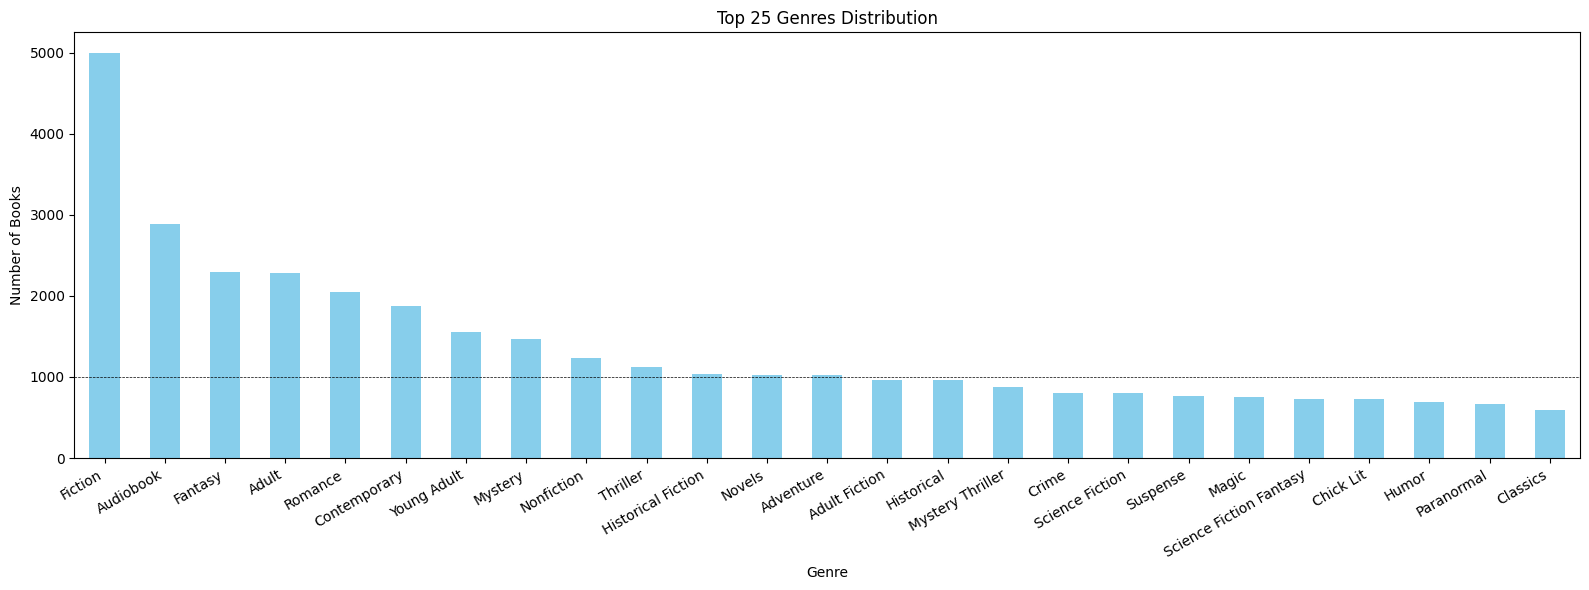

In [ ]:
top_genres = pd.Series(all_genres2).value_counts().head(25)

# Plot the bar chart
plt.figure(figsize=(16, 6))
top_genres.plot(kind='bar', color='skyblue')
plt.title(f'Top {25} Genres Distribution')
plt.xlabel('Genre')
plt.ylabel('Number of Books')
plt.xticks(rotation=30, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.axhline(y=1000,linewidth=0.5, color='k', linestyle='--')


plt.show()

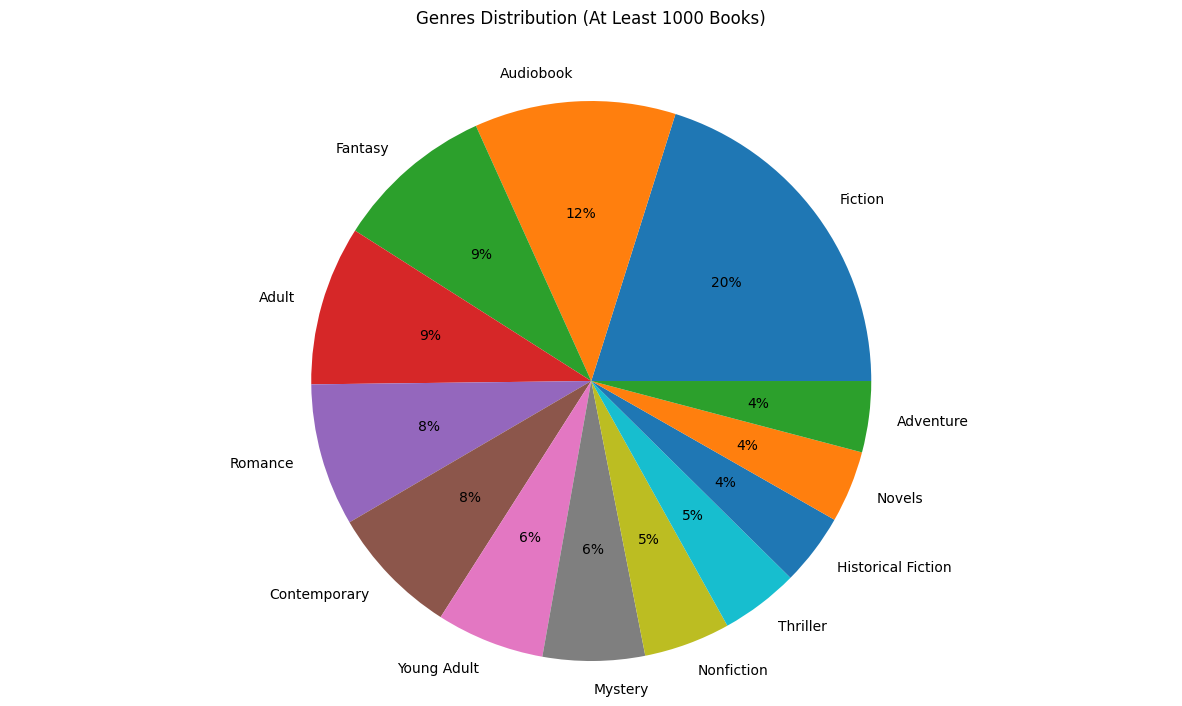

In [ ]:


# Count the number of books for each genre
genre_counts = pd.Series(all_genres2).value_counts()

# Filter genres with at least 1000 books
min_books_count = 1000
selected_genres = genre_counts[genre_counts >= min_books_count]

# Plot the pie chart for genres with at least 1000 books
plt.figure(figsize=(15, 8))
plt.pie(selected_genres, labels=selected_genres.index, autopct='%1.f%%', colors= plt.cm.tab10.colors)
plt.title(f'Genres Distribution (At Least {min_books_count} Books)\n\n')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [ ]:
genre_counts

Fiction                     5000
Audiobook                   2886
Fantasy                     2289
Adult                       2288
Romance                     2043
                            ... 
African American Romance       1
Alcohol                        1
Virtual Reality                1
Serbian Literature             1
Komik                          1
Length: 635, dtype: int64

In [ ]:
selected_genres

Fiction               5000
Audiobook             2886
Fantasy               2289
Adult                 2288
Romance               2043
Contemporary          1873
Young Adult           1550
Mystery               1462
Nonfiction            1239
Thriller              1121
Historical Fiction    1031
Novels                1030
Adventure             1019
dtype: int64

In [ ]:


for x in selected_genres.index:
  print(x)

Fiction
Audiobook
Fantasy
Adult
Romance
Contemporary
Young Adult
Mystery
Nonfiction
Thriller
Historical Fiction
Novels
Adventure


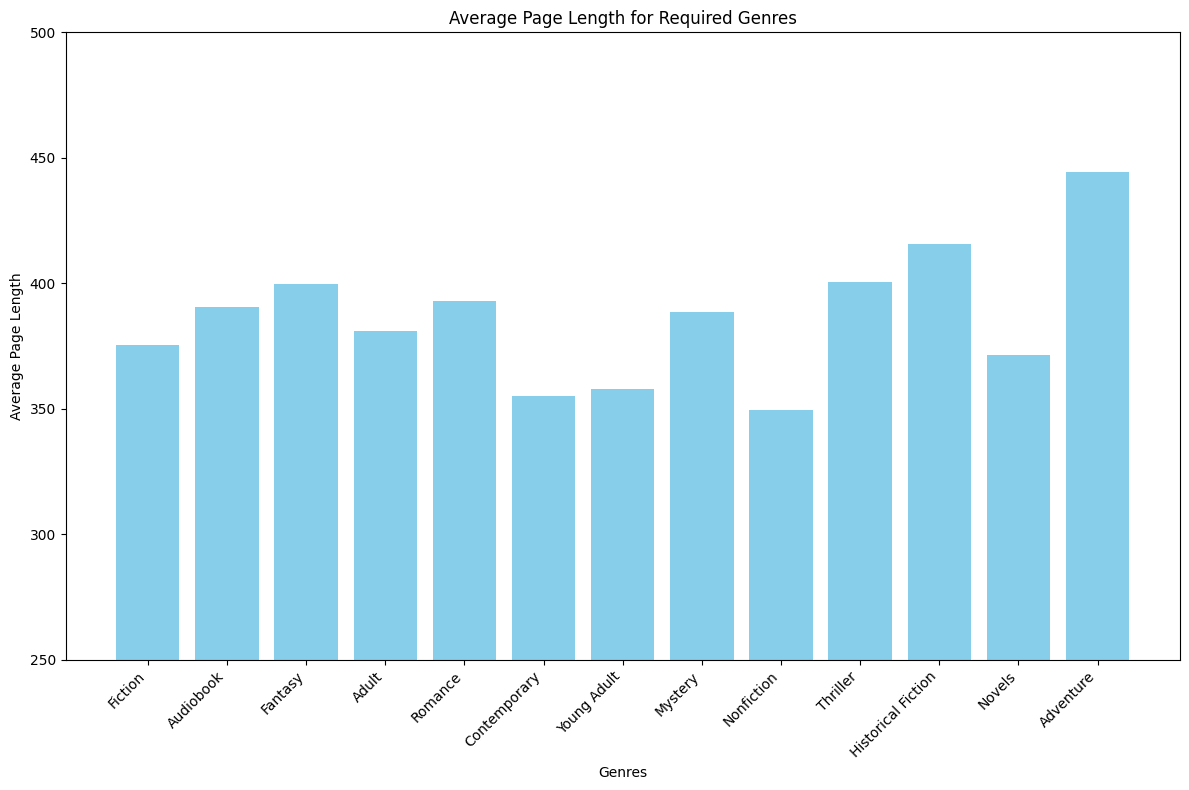

In [ ]:
average_page_lengths = []

for genre in selected_genres.index:
    genre_df = MainFile[MainFile['Genres'].str.contains(genre, case=False, na=False)]
    average_page_length = genre_df['Pages'].mean()
    average_page_lengths.append((genre, average_page_length))

# Create a DataFrame from the results
average_page_length_df = pd.DataFrame(average_page_lengths, columns=['Genre', 'Average Page Length'])

# Plot the average page length for each genre
plt.figure(figsize=(12, 8))
plt.bar(average_page_length_df['Genre'], average_page_length_df['Average Page Length'], color='skyblue')
plt.title('Average Page Length for Required Genres')
plt.xlabel('Genres')
plt.ylabel('Average Page Length')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.ylim(250,500)
plt.show()

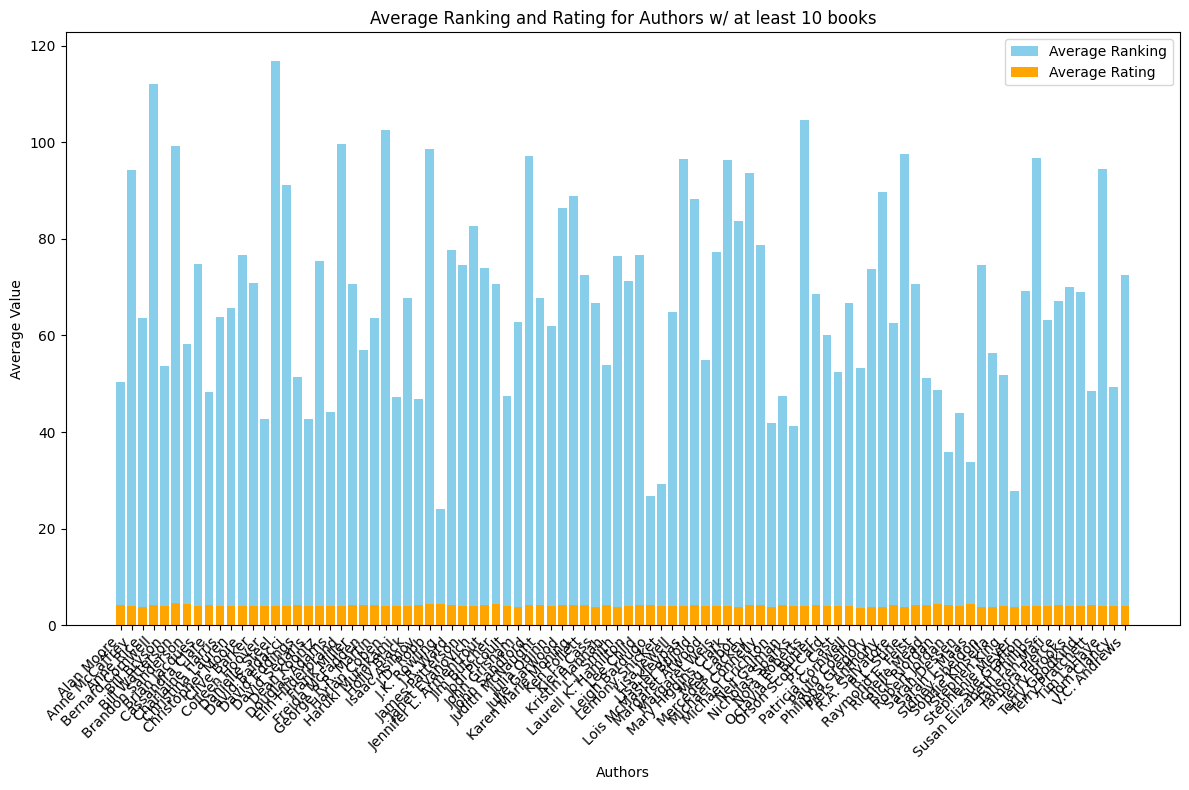

In [ ]:
author_counts = MainFile['Author'].value_counts()

# Select the top 20 authors
top_authors = author_counts.head(92).index

# Filter the DataFrame to include only the top 20 authors
filtered_df = MainFile[MainFile['Author'].isin(top_authors)]

# Calculate the average ranking and rating for each author
average_data = filtered_df.groupby('Author').agg({'Ranking': 'mean', 'Rating': 'mean'}).reset_index()

# Plot the average ranking and rating for each author
plt.figure(figsize=(12, 8))

plt.bar(average_data['Author'], average_data['Ranking'], color='skyblue', label='Average Ranking')
plt.bar(average_data['Author'], average_data['Rating'], color='orange', label='Average Rating')

plt.title('Average Ranking and Rating for Authors w/ at least 10 books')
plt.xlabel('Authors')
plt.ylabel('Average Value')
plt.legend()
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
author_counts.head(92)

Stephen King         74
Nora Roberts         44
James Patterson      39
Terry Pratchett      38
Janet Evanovich      32
                     ..
John Sandford        10
Anne McCaffrey       10
V.C. Andrews         10
David Sedaris        10
Octavia E. Butler    10
Name: Author, Length: 92, dtype: int64

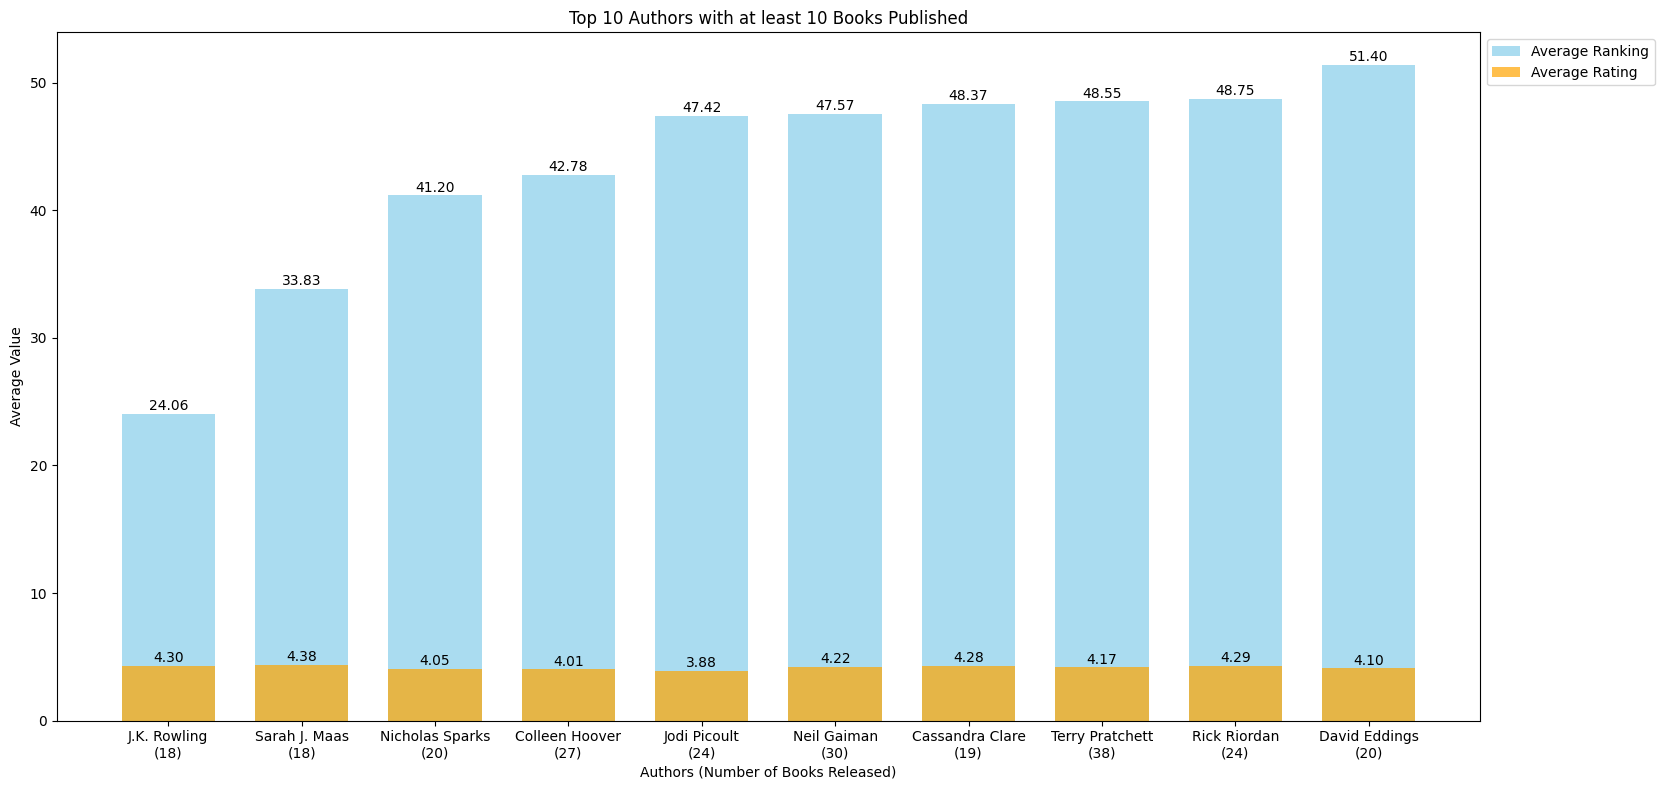

In [ ]:
author_counts = MainFile['Author'].value_counts()

# Select the top 20 authors
top_authors_20 = author_counts.head(20).index

# Filter the DataFrame to include only the top 20 authors
filtered_df_20 = MainFile[MainFile['Author'].isin(top_authors_20)]

# Calculate the average ranking and rating for each author
average_data = filtered_df_20.groupby('Author').agg({'Ranking': 'mean', 'Rating': 'mean', 'Title': 'count'}).reset_index()

# Sort authors based on ascending ranking
average_data = average_data.sort_values(by='Ranking').head(10)

# Plot the average ranking and rating for each author
plt.figure(figsize=(15, 8))

# Bar plots for average ranking and rating
for i, author in enumerate(average_data['Author']):
    label = f'{author}\n({average_data["Title"].iloc[i]})'
    plt.bar(label, average_data['Ranking'].iloc[i], color='skyblue', label='Average Ranking', alpha=0.7, width = 0.7)
    plt.bar(label, average_data['Rating'].iloc[i], color='orange', label='Average Rating', alpha=0.7, width = 0.7)

# Display values on top of the bars
for i, value in enumerate(average_data['Ranking']):
    plt.text(i, value + 0.05, f'{value:.2f}', ha='center', va='bottom', color='black')

for i, value in enumerate(average_data['Rating']):
    plt.text(i, value + 0.05, f'{value:.2f}', ha='center', va='bottom', color='black')

plt.title('Top 10 Authors with at least 10 Books Published')
plt.xlabel('Authors (Number of Books Released)')
plt.ylabel('Average Value')

#plt.xticks(rotation=0, ha='right')
plt.tight_layout()
plt.legend(['Average Ranking', 'Average Rating'], loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

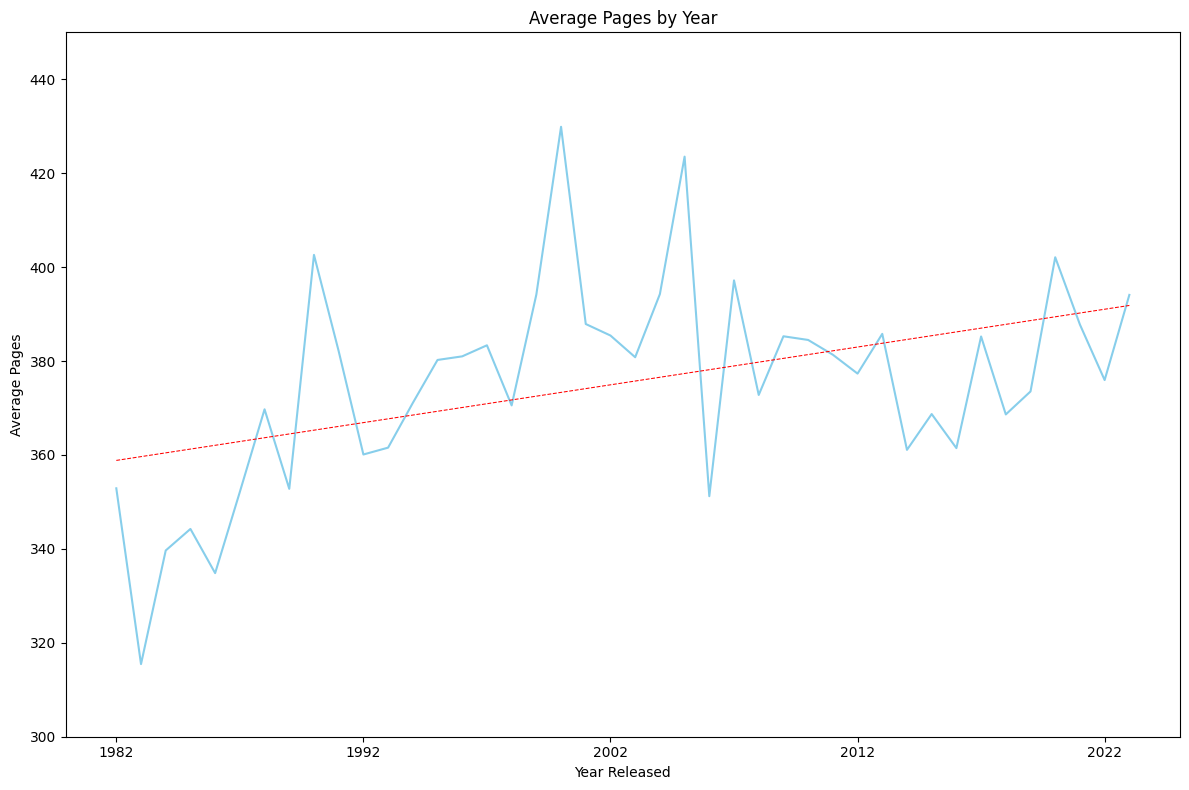

In [ ]:
average_pages_by_year = MainFile.groupby('YearReleased')['Pages'].mean()

# Plot the average pages for each year using a line graph
plt.figure(figsize=(12, 8))
plt.plot(average_pages_by_year.index, average_pages_by_year, color='skyblue', linestyle='-')
plt.title('Average Pages by Year')
plt.xlabel('Year Released')
plt.ylabel('Average Pages')

# Set x-axis ticks with an increment of 10
plt.xticks(range(min(average_pages_by_year.index), max(average_pages_by_year.index) + 1, 10))

# Set y-axis range from 200 to 600
plt.ylim(300, 450)

coefficients = np.polyfit(average_pages_by_year.index, average_pages_by_year, 1)
poly = np.poly1d(coefficients)

plt.plot(average_pages_by_year.index, poly(average_pages_by_year.index), color='red', linestyle='--',linewidth=0.75,  label='Line of Best Fit')

#plt.legend()


plt.tight_layout()
plt.show()

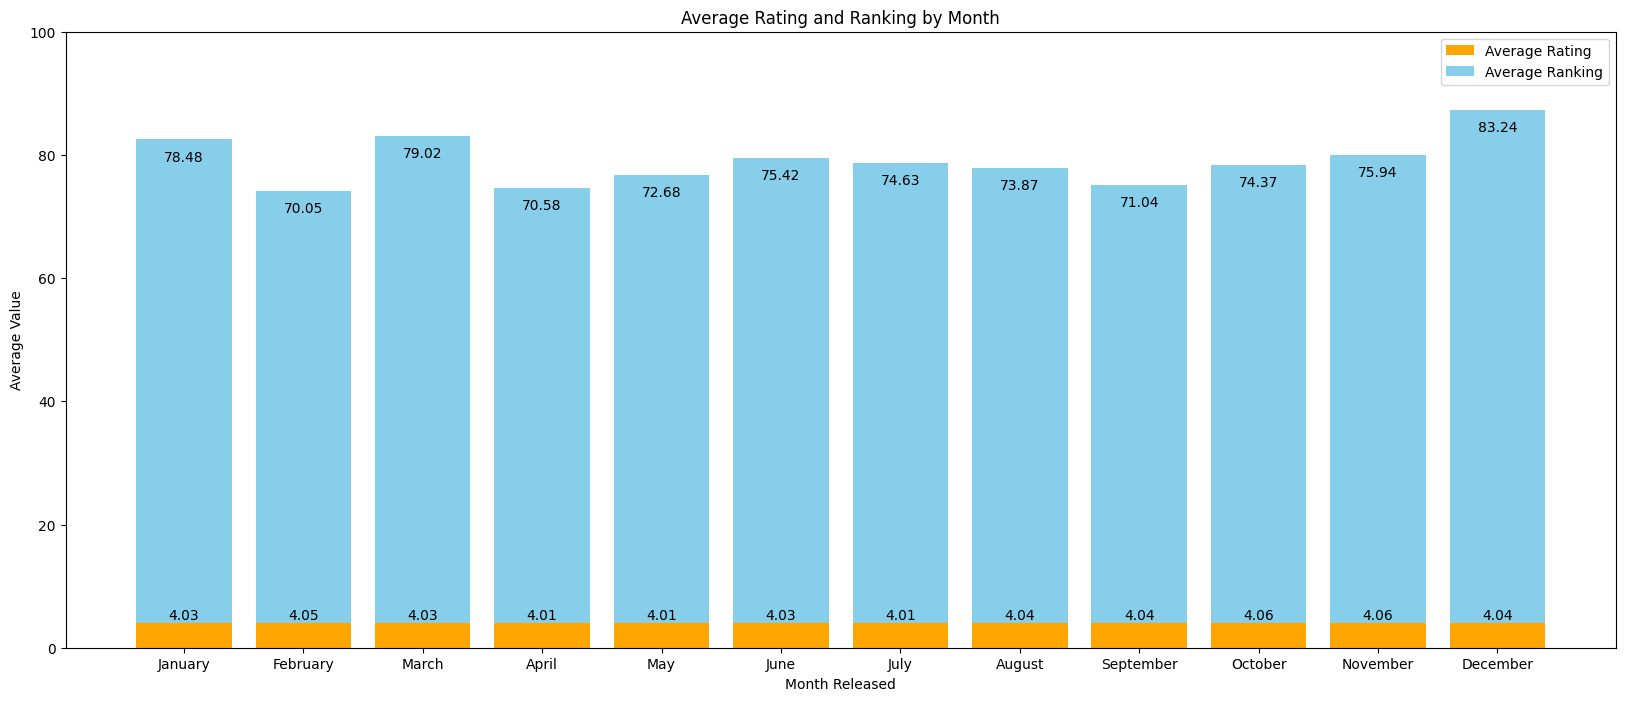

In [ ]:
plt.figure(figsize=(20, 8))
bar_width = 0.4

# Plot average rating
rating_bars = plt.bar(average_monthly_data.index, average_monthly_data['Rating'], color='orange', label='Average Rating')

# Plot average ranking on top of average rating
ranking_bars = plt.bar(average_monthly_data.index, average_monthly_data['Ranking'], color='skyblue', bottom=average_monthly_data['Rating'], label='Average Ranking')

# Annotate the values on each bar for rating
for i, value in enumerate(average_monthly_data['Rating']):
    plt.text(i, value + 0.05, f'{value:.2f}', ha='center', va='bottom', color='black')

# Annotate the values on each bar for ranking
for i, value in enumerate(average_monthly_data['Ranking']):
    plt.text(i, value + 0.05, f'{value:.2f}', ha='center', va='bottom', color='black')

plt.title('Average Rating and Ranking by Month')
plt.xlabel('Month Released')
plt.ylabel('Average Value')
plt.legend()

plt.ylim(0, 100)
#plt.xticks(rotation=45, ha='right')
#plt.tight_layout()
plt.show()